# Monte Carlo Simulation for Estimating Pi

Monte Carlo methods are widely used for numerical simulations, optimization problems, and probabilistic modeling.
One of the classic problems that showcase the power of Monte Carlo simulations is estimating the value of $\pi$.
The idea is simple: randomly generate points inside a square and count how many fall within a quarter-circle.
The ratio of points inside the quarter-circle to the total number of points gives an approximation of $\pi$.

This approach leverages the relationship between the areas of a quarter circle (with radius $r$) and its bounding square (with side length r):

- Area of quarter circle = $\frac{\pi r^2}{4}$
- Area of square = $r^2$

Therefore, the ratio of these areas is:

$$
\frac{\text{Area of quarter circle}}{\text{Area of square}} = \frac{\pi r^2/4}{r^2} = \frac{\pi}{4}
$$

Thus,

$$
\pi = 4 \cdot \frac{\text{Area of quarter circle}}{\text{Area of square}}
$$

As we increase the number of random points, our approximation becomes more accurate, demonstrating the law of large numbers in action.
While this isn't the most efficient way to calculate $\pi$, it elegantly demonstrates how randomized algorithms can solve deterministic problems and introduces key concepts in parallel computing.

## Our approach

To computationally estimate the ratio using the Monte Carlo method, we need to:

1. Generate a large number of random points within a unit square (with coordinates from 0 to 1).
2. Determine which points lie within a quarter circle.
3. Calculate the ratio of points inside the circle to total points generated.

A point $(x, y)$ lies within a quarter circle of radius 1 if the distance from the point to the origin is less than or equal to 1.
Using the Pythagorean theorem, this means that a point is inside the quarter circle if:

$$
x^2 + y^2 \leq 1
$$

First, let's get some imports out of the way.

In [1]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

import ray

if not ray.is_initialized():
    ray.init()


2025-07-14 20:03:46,544	INFO worker.py:1888 -- Started a local Ray instance.


Now let's draw a quarter circle using matplotlib.

In [2]:
def quarter_circle_coords(resolution: int = 100) -> tuple[np.ndarray, np.ndarray]:
    """
    Compute the x,y coordinates of a quarter‑circle of radius 1
    from θ=0 to θ=π/2.

    Args:
        resolution: Number of points along the curve.

    Returns:
        (x_circle, y_circle): Arrays of coordinates.
    """
    theta = np.linspace(0, np.pi / 2, resolution)
    return np.cos(theta), np.sin(theta)

We can view this circle using matplotlib.

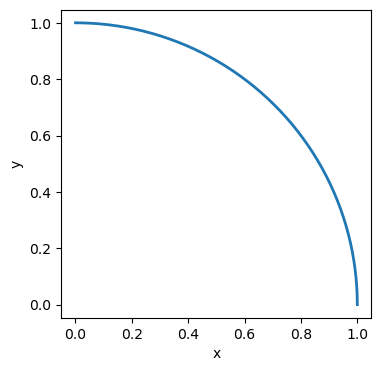

In [3]:
xc, yc = quarter_circle_coords(200)
plt.figure(figsize=(4,4))
plt.plot(xc, yc, lw=2, label='Quarter Circle (r=1)')
plt.axis('equal')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

Here you see the smooth arc from (1,0) up to (0,1).
This is just the boundary of the region we’ll be sampling inside.

Our Monte Carlo estimate uses randomly‐placed points in the unit square [0,1]×[0,1].  
We’ll compare how many of them land inside that blue arc vs. outside—this ratio gives us π.

In [4]:
def unit_square_coords() -> tuple[list[float], list[float]]:
    """
    Return the closed polygon (x,y) for the unit square [0,1]×[0,1].
    """
    xs = [0, 1, 1, 0, 0]
    ys = [0, 0, 1, 1, 0]
    return xs, ys

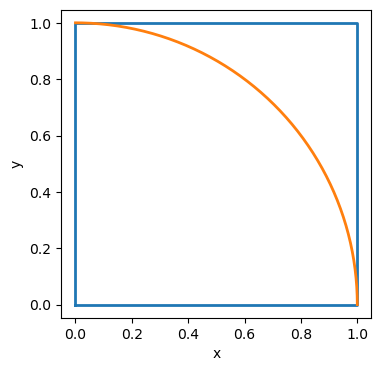

In [5]:
xsq, ysq = unit_square_coords()
plt.figure(figsize=(4,4))
plt.plot(xsq, ysq, lw=2, label='Unit Square')
plt.plot(xc, yc, lw=2, label='Quarter Circle (r=1)')
plt.axis('equal')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

In [6]:
def sample_points(n_samples: int) -> int:
    """
    Generate uniformly random (x,y) in [0,1] × [0,1].

    Returns:
        Number of randomly sampled points located inside the circle.
    """
    n_inside = 0
    for _ in range(n_samples):
        x,y = random.random(), random.random()
        if x*x + y*y <= 1:
            n_inside += 1
    return n_inside

In [7]:
def estimate_pi(n_samples: int, n_inside: int) -> float:
    """
    Run one Monte Carlo simulation of num_points and return π estimate.
    """
    return 4. * (n_inside / n_samples)

In [8]:
def monte_carlo_pi(n_samples: int = 1000) -> tuple[float, float]:
    """
    Use Monte Carlo to estimate pi.

    Args:
        n_samples: total random points to generate.

    Returns:
        Estimate of pi

        Total computation time.
    """
    t_start = time.time()
    n_inside = sample_points(n_samples)
    pi_est = estimate_pi(n_samples, n_inside)
    t_stop = time.time()
    return pi_est, t_stop - t_start

In [9]:
n_samples = 1_000
pi_est, t_delta = monte_carlo_pi(n_samples)

print(f"Pi     ≈ {pi_est:.8f}")
print(f"Error  = {np.pi - pi_est:.8f}")
print(f"Time   = {t_delta:.4f} s")

Pi     ≈ 3.17200000
Error  = -0.03040735
Time   = 0.0001 s


In [10]:
n_samples = 100_000
pi_est, t_delta = monte_carlo_pi(n_samples)

print(f"Pi     ≈ {pi_est:.8f}")
print(f"Error  = {np.pi - pi_est:.8f}")
print(f"Time   = {t_delta:.4f} s")

Pi     ≈ 3.14308000
Error  = -0.00148735
Time   = 0.0117 s


In [11]:
n_samples = 1_000_000
pi_est, t_delta = monte_carlo_pi(n_samples)

print(f"Pi     ≈ {pi_est:.8f}")
print(f"Error  = {np.pi - pi_est:.8f}")
print(f"Time   = {t_delta:.4f} s")

Pi     ≈ 3.14072400
Error  = 0.00086865
Time   = 0.0832 s


In [12]:
n_samples = 100_000_000
pi_est, t_delta = monte_carlo_pi(n_samples)

print(f"Pi     ≈ {pi_est:.8f}")
print(f"Error  = {np.pi - pi_est:.8f}")
print(f"Time   = {t_delta:.4f} s")

Pi     ≈ 3.14145316
Error  = 0.00013949
Time   = 8.3804 s


In [13]:
n_samples = 1_000_000_000
pi_est, t_delta = monte_carlo_pi(n_samples)

print(f"Pi     ≈ {pi_est:.8f}")
print(f"Error  = {np.pi - pi_est:.8f}")
print(f"Time   = {t_delta:.4f} s")

Pi     ≈ 3.14161175
Error  = -0.00001909
Time   = 83.3244 s


## How Parallelization Helps

The Monte Carlo estimation of $\pi$ is a textbook example of an "embarrassingly parallel" problem.

1. **Complete Independence**: Each random sample is independent of all other samples.
2. **No Shared State**: Workers don't need to communicate or synchronize with each other.
3. **Minimal Overhead**: The computation-to-communication ratio is extremely high.
4. **Linear Scaling**: Doubling the computing resources can nearly double the throughput.
5. **Simple Aggregation**: Results from all workers can be combined with a simple sum.


In [14]:
from raygent import Task


class MonteCarloPiTask(Task[list[int], int]):

    def do(self, items: list[int]) -> int:
        """Simulates a Monte Carlo experiment for estimating Pi.

        Args:
            items: The number of random points to generate in this task instance.

        Returns:
            The count of points that fell inside the quarter-circle.
        """
        n_inside = sample_points(items[0])

        return n_inside

Here, the method [`do`](https://raygent.oasci.org/api/task/#task.Task.do) takes an integer parameter representing the number of points to generate in each task.
It then:

1. Creates the specified number of random points with x and y coordinates between 0 and 1;
2. Checks each point to see if it falls within the quarter-circle (where x² + y² ≤ 1);
3. Counts and returns the total number of points that landed inside the quarter-circle.

Each task instance will process its own batch of points independently, allowing the workload to be distributed efficiently across multiple cores or machines.

## Running the Task with `TaskManager`

The `raygent` framework's [`TaskManager`](https://raygent.oasci.org/api/manager/#manager.TaskManager) enables us to distribute this workload efficiently:

1. We divide our desired total number of samples into smaller chunks.
2. Each chunk becomes an independent task assigned to worker processes.
3. Multiple CPU cores process these tasks simultaneously.
4. The framework handles all the task scheduling and result collection.
5. Results are aggregated to calculate the final π approximation.

This approach can achieve near-linear speedup relative to the number of CPU cores available.
For example, on a 16-core machine, we can potentially compute results up to 16 times faster than using a single core.
Even better, by leveraging Ray's distributed computing capabilities through [`TaskManager`](https://raygent.oasci.org/api/manager/#manager.TaskManager), we can scale beyond a single machine to a cluster of computers with minimal code changes.

Our `MonteCarloPiTask` class encapsulates the core algorithm while [`TaskManager`](https://raygent.oasci.org/api/manager/#manager.TaskManager) handles all the complexities of distributing the work, making parallelization straightforward and effective.


In [15]:
from raygent import TaskManager


def estimate_pi_parallel(n_samples: int, n_workers: int) -> float:
    """Estimates Pi using Monte Carlo simulation with parallel execution.

    Args:
        n_samples: Total number of samples.
        n_workers: Number of independent Monte Carlo simulations to run.

    Returns:
        Estimated value of π.
    """
    manager: TaskManager[list[int], int] = TaskManager(
        MonteCarloPiTask(), n_cores=n_workers, use_ray=True
    )

    samples_per_worker = n_samples // n_workers

    t_start = time.time()
    manager.submit_tasks(items=[samples_per_worker] * n_workers, chunk_size=1)
    results = manager.get_results()
    n_inside = sum(results)
    n_samples = samples_per_worker * n_workers
    pi_estimate = estimate_pi(n_samples, n_inside)
    t_stop = time.time()

    return pi_estimate, t_stop - t_start

In [16]:
pi_est, t_delta = estimate_pi_parallel(n_samples=1_000_000_000, n_workers=8)
print(f"Pi     ≈ {pi_est:.8f}")
print(f"Error  = {np.pi - pi_est:.8f}")
print(f"Time   = {t_delta:.4f} s")

Pi     ≈ 3.14162994
Error  = -0.00003729
Time   = 15.8711 s
